In [1]:
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns

In [3]:
data = pd.read_csv('../../survey.csv')

In [4]:
data.head()

,Timestamp,In one sentence describe how you feel about this program. (for sentiment analysis),Which programming language are you most comfortable using to make data visualizations?,What is your favorite type of plot to make?,Are you colorblind?,How old are you?,Where are you from?,How difficult is it for you to make a barplot?,What's your favorite visualization package?,How difficult is it for you to make a boxplot?,How difficult is it for you to make a line graph?,How difficult is it for you to make a stacked area graph?,What are you most excited to learn about in this class?,What are you least excited about in this class?,What is one type of plot that you're curious about but haven't made before?,What do you want to get out of this class?,How many hours a week do you expect to spend on hw for this course?,"How interested are you in participating in data visualization competitions (on reddit, kaggle, etc) as part of this course?",How comfortable are you doing a presentation in front of 40-80 people?
0,3/19/2019 11:07:46,.......:),python,NaN,No,23.0,...,1,NaN,1.0,1,2.0,..,presentation,////,...,0.0,1,1
1,3/19/2019 11:08:26,intensive but happy.,Python,Histogram,No,26.0,China,1,NaN,2.0,1,4.0,data visualization with real word applications.,no idea yet,dynamic plotting,to learn what is needed for a data scientist,2.0,5,4
2,3/19/2019 11:08:57,It's intensive and the courses are helpful.,python,Scatterplot,No,28.0,Taiwan,2,NaN,3.0,1,4.0,Create cool visualization,Learn to create amazing visualization from the...,bubble plots,I hope I can visualize data fluently,4.0,5,3
3,3/19/2019 11:09:19,I really enjoy the program and the whole atmos...,Python,Histogram,No,29.0,Russia,2,NaN,3.0,1,4.0,Powerful and easy visualization libraries,not studying JS for data viz,Bubble chart,Getting used to making cool visualizations in ...,4.0,3,4
4,3/19/2019 11:09:26,Stressful,Python,Histogram,No,26.0,china,2,NaN,3.0,1,3.0,Interactive graphs,Assignments,3d visualizations,Data visualization principles,7.0,4,5


In [5]:
data = data[['How many hours a week do you expect to spend on hw for this course?', 'How comfortable are you doing a presentation in front of 40-80 people?','How interested are you in participating in data visualization competitions (on reddit, kaggle, etc) as part of this course?']]
data.columns = ['Hours', 'presentation', 'kaggle']

In [6]:
data.describe()

,Hours,presentation,kaggle
count,84.000000,84.000000,84.000000
mean,3.934524,3.488095,3.154762
std,3.591137,1.265807,1.357656
min,0.000000,1.000000,1.000000
25%,2.375000,3.000000,2.000000
50%,3.000000,4.000000,3.000000
75%,4.000000,4.000000,4.000000
max,30.000000,5.000000,5.000000


In [7]:
def category_maker(row):
    if row > 3:
        return 'confident'
    if row == 3:
        return 'meh'
    if row < 3:
        return 'not so confident'
data['Presentation Confidence Level'] = data.presentation.apply(category_maker)

In [8]:
def kaggle_cat(row):
    if row > 3:
        return 'Kaggle'
    if row <= 3:
        return 'No Kaggle'
data['Kaggle Preference'] = data.kaggle.apply(kaggle_cat)

In [9]:
data = data[data['Hours']<30]

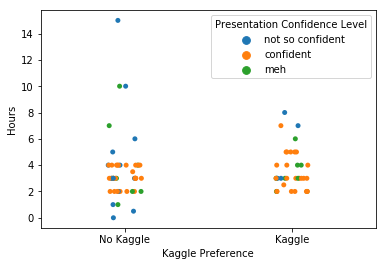

In [10]:
sns.stripplot(x=data['Kaggle Preference'], y=data['Hours'], hue=data['Presentation Confidence Level'] , jitter=True)

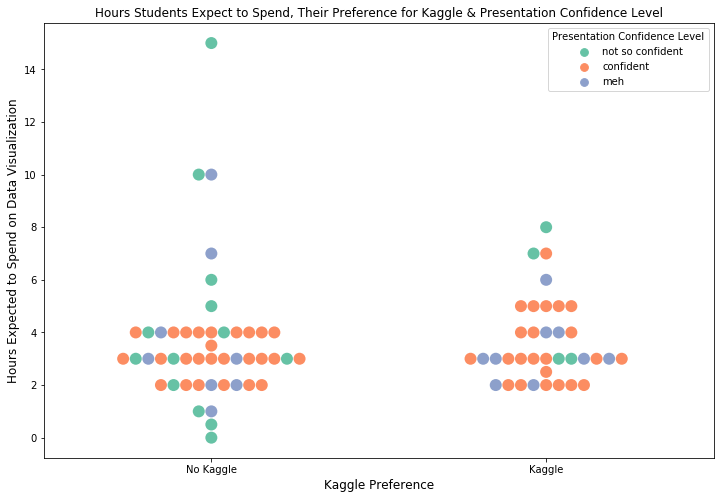

In [28]:
plt.figure(figsize=(12,8))
sns.swarmplot(x=data['Kaggle Preference'], y=data['Hours'], 
              hue=data['Presentation Confidence Level'], 
              palette="Set2", size=12, marker='o').set_title("Hours Students Expect to Spend, Their Preference for Kaggle & Presentation Confidence Level").set_size(12)

plt.xlabel('Kaggle Preference', fontsize='large')
plt.ylabel('Hours Expected to Spend on Data Visualization', fontsize='large')

plt.show()